In [1]:
import os

import pandas
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly
import numpy
import matplotlib.pyplot as plt
#import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset 
census_income = fetch_ucirepo(id=20)

# data (as pandas dataframes) 
X = census_income.data.features
y = census_income.data.targets
# metadata 
print(census_income.metadata)
# variable information 
print(census_income.variables)

ModuleNotFoundError: No module named 'ucimlrepo'

In [52]:
data = pandas.concat([X, y], axis=1)
data.to_csv("CensusIncome.csv",index=False)

In [2]:
data = pandas.read_csv("CensusIncome.csv")

In [17]:
# display first 5 rows of df dataframe
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
X.shape

(48842, 14)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# DATA UNDERSTANDING
<ol>
<li style="color:rgb(37, 150, 190); font-size:25px">What is the distribution of income levels in the dataset?</li>
<li style="color:rgb(37, 150, 190); font-size:25px">How does the level of education relate to income?</li>
<li style="color:rgb(37, 150, 190); font-size:25px">Are there any differences in income distribution based on gender or race?</li>
<li style="color:rgb(37, 150, 190); font-size:25px">What are the most common occupations and work classes?</li>
<li style="color:rgb(37, 150, 190); font-size:25px">How does age correlate with income?</li>
<li style="color:rgb(37, 150, 190); font-size:25px">What patterns exist between hours worked per week and income?</li>
<li style="color:rgb(37, 150, 190); font-size:25px">Is there a relationship between marital status and income?</li>
<li style="color:rgb(37, 150, 190); font-size:25px">How do capital gains and losses affect income levels?</li>
<li style="color:rgb(37, 150, 190); font-size:25px">Are there any geographical patterns in income levels based on native country?</li>
</ol>

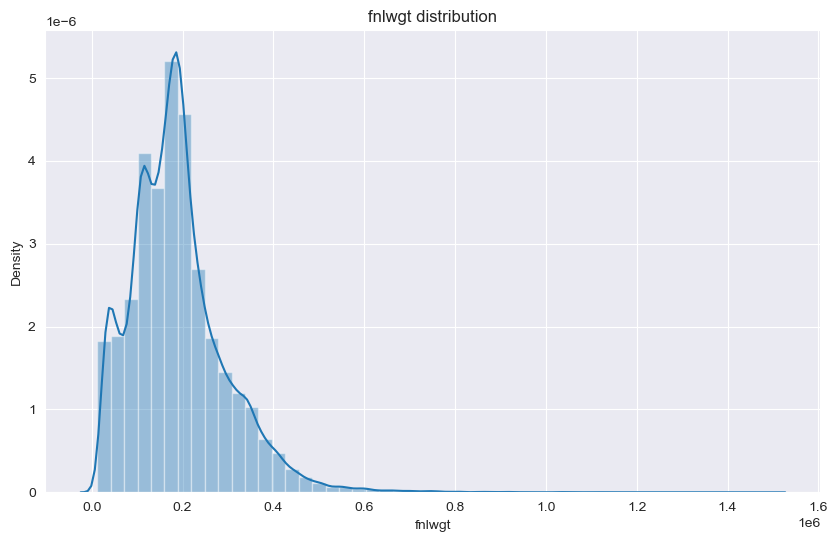

In [25]:
# 1 - Distribution of the income target
plt.figure(figsize=(10,6))
sns.distplot(a= data["fnlwgt"] ,kde= True)
plt.title("fnlwgt distribution")
plt.show()

In [29]:
px.bar(data ,x="income",y="fnlwgt",text_auto=".2",color="hours-per-week")

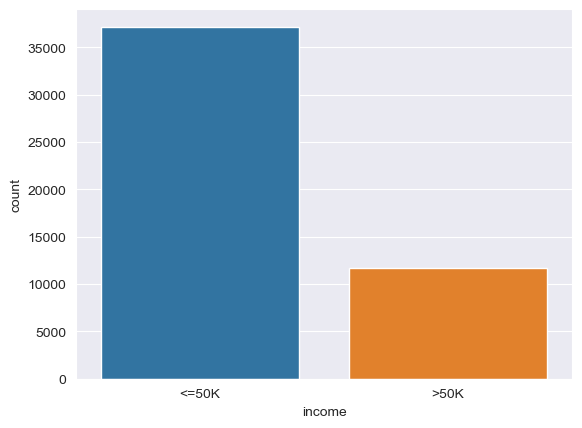

In [56]:
sns.countplot(data=data,x="income")
plt.show()

In [36]:
education_income_grouped = data.groupby('education')['income'].value_counts(normalize=True).unstack()

# Display the proportions
education_income_grouped

income,<=50K,<=50K.,>50K,>50K.
education,,,,
10th,0.627070,0.310295,0.044636,0.017999
11th,0.615342,0.333885,0.033113,0.017660
12th,0.608828,0.318113,0.050228,0.022831
1st-4th,0.655870,0.311741,0.024291,0.008097
5th-6th,0.622790,0.324165,0.031434,0.021611
7th-8th,0.634555,0.300524,0.041885,0.023037
9th,0.644180,0.301587,0.035714,0.018519
Assoc-acdm,0.500937,0.241099,0.165522,0.092442
Assoc-voc,0.495391,0.251334,0.175158,0.078117


# Machine Learning Development  usind comet as ml tracker

In [3]:
import comet_ml
from pycaret.classification import *
comet_ml.init(project_name="mlproject")

In [6]:
from comet_ml import Experiment
import xgboost as xgb

experiment = Experiment(
    api_key="WUFT5c2sCir1FOduHmAodAt8b",
    project_name="mlproject",
    workspace="yateolivera"
)

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: mlflow, sklearn.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in 'C:\\Users\\flora\\OneDrive\\Desktop\\Data Science Project\\Data Analyst' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Experiment is live on comet.com https://www.comet.com/yateolivera/mlproject/203f3c97b51144f0b130158312f97206



Please paste your Comet API key from https://www.comet.com/api/my/settings/
(api key may not show as you type)


COMET INFO: Valid Comet API Key saved in C:\Users\flora\.comet.config (set COMET_CONFIG to change where it is saved).


In [9]:
from pycaret.classification import *

In [4]:
clf1 = (
    setup(
        data,
        target="income",
        log_experiment="comet_ml",
        experiment_name="Experiemce 1",
        log_data=True,
    ),
)

# model training


COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/yateolivera/experiemce-1/8891ef21fe884b86bfab912246cb4ea6



In [ ]:
# model training
best_model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:58:18
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/yateolivera/experiemce-1/8891ef21fe884b86bfab912246cb4ea6
COMET INFO:   Others:
COMET INFO:     Name : Session Initialized fe12
COMET INFO:   Parameters:
COMET INFO:     add_indicator                     : False
COMET INFO:     ccp_alpha                         : 0.0
COMET INFO:     constant                          : None
COMET INFO:     copy                              : True
COMET INFO:     criterion                         : friedman_mse
COMET INFO:     fill_value                        : None
COMET INFO:     init                              : None
COMET INFO:     keep_empty_features               : False
COMET INFO:     l

In [ ]:
comet_logger = clf1[0].logging_param.loggers[0]

comet_logger.finish_experiment()
comet_logger.run.display("panels")

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
